<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head(60)
# data['LSTAT', 'MEDV']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015FF9FCA4E0>,
      dtype=object)

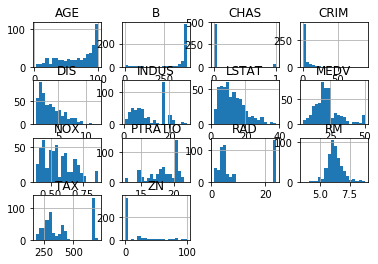

In [3]:
# sns.set(style="ticks", color_codes=True)
# iris = sns.load_dataset("iris")
# g = sns.pairplot(data)
data.hist(bins = 20)

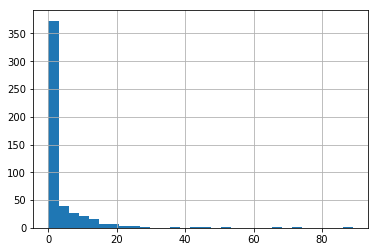

In [4]:
data['CRIM'].hist(bins = 30)
# Geometric

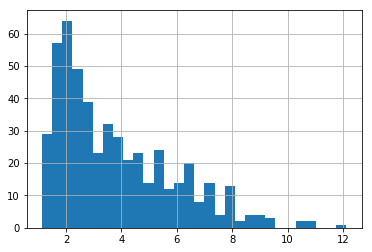

In [5]:
data['DIS'].hist(bins = 30)
# LogNormal

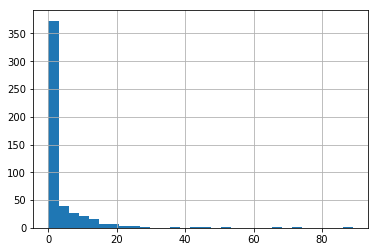

In [6]:
data['CRIM'].hist(bins = 30)
# 

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное - RM+
2.   Равномерное - нет (графика равномерного вида нет)
3.   Биноминальное - RAD +
4.   Бернулли - CHAS+
5.   Геометрическое - нет (CRIM по виду похожа, но непрерывная. Геометрическая - дискретная)
6.   Логнормальное - DIS+




Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [7]:
df = data[['LSTAT','MEDV']]


df['LSTAT'].fillna(0, inplace = True)
df['MEDV'].fillna(0, inplace = True)
df.info

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<bound method DataFrame.info of      LSTAT  MEDV
0     4.98  24.0
1     9.14  21.6
2     4.03  34.7
3     2.94  33.4
4     5.33  36.2
..     ...   ...
501   9.67  22.4
502   9.08  20.6
503   5.64  23.9
504   6.48  22.0
505   7.88  11.9

[506 rows x 2 columns]>

In [8]:
# Построим модель для двух переменных Freedom и Positive affect
LSTAT = df['LSTAT']
MEDV = df['MEDV']
# Для sklearn сделаем reshape(-1,1) и преобразуем Series данные в numpy array
LSTAT = np.array(LSTAT).reshape(-1,1)
MEDV = np.array(MEDV).reshape(-1,1)
# Линейная регрессия строится на том основании, что две переменные имеют линейную зависимость.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Разделим на 80% тренировочных и на 20% тестовых
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    LSTAT,
    MEDV,
    test_size = 0.2,
    random_state = 3
)
# Обучим модель
model.fit(X_train, y_train)

# Посмотрим предсказания модели на тестируемых данных
predicted_y = model.predict(X_test)
# Посчитаем ошибку модели
model.score(X_test, y_test)


0.5690773142169756

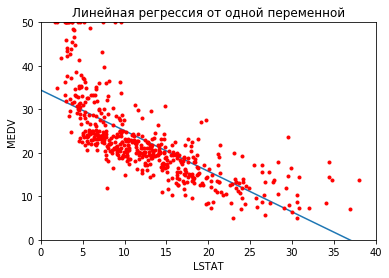

In [9]:
# Построим график линейной регресии
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)
# Посчитаем предсказанные значения
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(LSTAT, MEDV, 'r.')
plt.xlim(0,40)
plt.ylim(0,50)
plt.show()
# 

In [10]:
# LSTAT: This is the percentage lower status of the population
# MEDV: This is the median value of owner-occupied homes in 1000 dollars
# Чем выше процент населения с низким статусом, тем меньше медиана цены.
# Зависимость больше похожа не на линейную, а на Экспоненциальную

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [37]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [38]:
X = data.iloc[:,1:]
X.head()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [39]:
# Посчитать матрицу ковариаций попарно.
np.round_(np.cov(X), decimals=2)

array([[ 2.89790e+02,  1.19770e+02,  4.43300e+01, ...,  1.25130e+02,
        -8.81800e+01, -1.77640e+02],
       [ 1.19770e+02,  9.09000e+01,  6.08900e+01, ..., -2.90200e+01,
        -1.20400e+01,  6.42000e+00],
       [ 4.43300e+01,  6.08900e+01,  6.28900e+01, ..., -1.00000e+01,
         8.56000e+00, -7.80000e-01],
       ...,
       [ 1.25130e+02, -2.90200e+01, -1.00000e+01, ...,  1.47960e+03,
         2.94200e+02, -3.29000e+00],
       [-8.81800e+01, -1.20400e+01,  8.56000e+00, ...,  2.94200e+02,
         2.80620e+02,  3.65530e+02],
       [-1.77640e+02,  6.42000e+00, -7.80000e-01, ..., -3.29000e+00,
         3.65530e+02,  1.02449e+03]])

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [40]:
# Проверка по формуле
data.isnull().sum().sum()

23

In [41]:
data.info()
# Проверка по info путем добавления до полного количества строк
# Ответ: 4+8+1+4+6 = 23

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Сколько стран в выборке? Написать ответ. 

In [42]:
import numpy as np
unic_country = set(data['Country (region)'])
len(unic_country)


156

In [43]:
# Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.
# По info() видно что null значений нет. Для демонстрации удаления - пропишем код, но он ничего не сделает с выборкой
# data = data[np.isfinite(data['Country (region)'])]
data = data[pd.notnull(data['Country (region)'])]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.6+ KB


Добавить новую колонку в таблицу - 'continent'. Каждая страна относится к определенному материку. Всего материко 6:
*   Евразия,
*   Африка,
*   Северная Америка,
*   Южная Америка,
*   Австралия,
*   Антарктида.

Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента. 

In [44]:
data_cont = pd.read_csv('continents.csv', encoding ='utf-8')
data = pd.merge(data, data_cont, left_on = 'Country (region)' ,right_on = 'Country')
del data['Country']
data.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy,continent
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Euroasia
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Euroasia
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Euroasia
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Euroasia
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Euroasia
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0,Euroasia
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0,Euroasia
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0,Australia
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0,North America
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0,Euroasia


Нарисовать sns.pairplot для класса - континет. Из графика сделать вывод о том, какие континеты похожи.

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


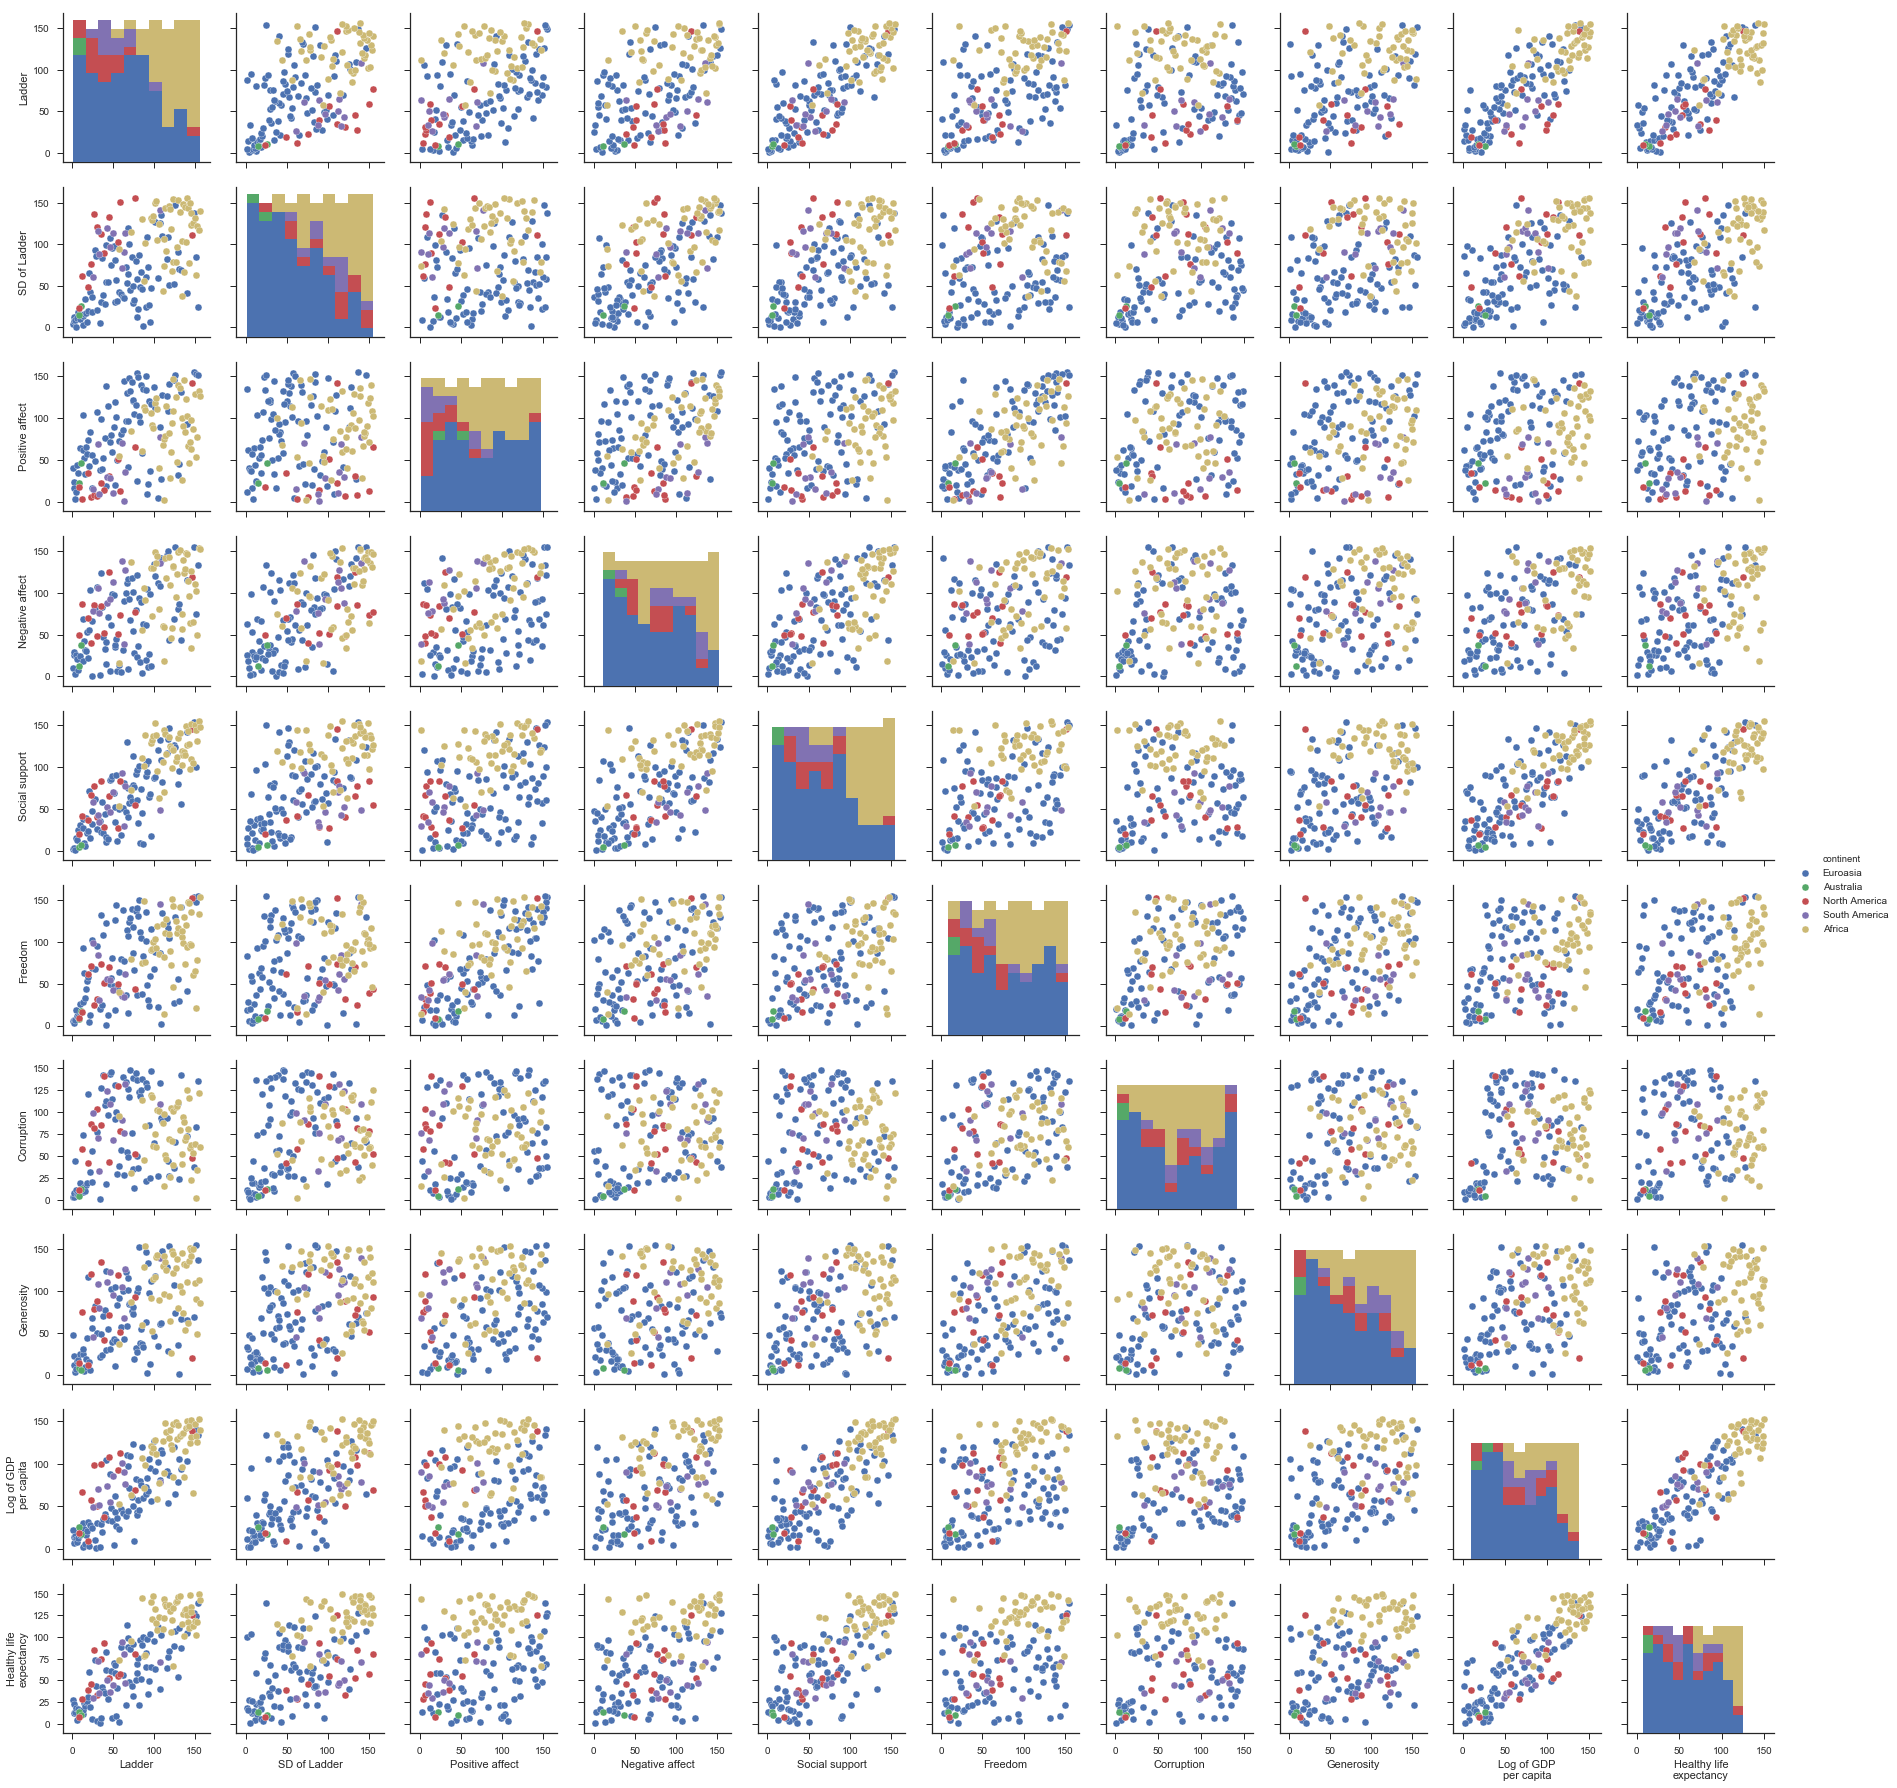

In [45]:
# пример кода на точечный график по континентам
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data, hue='continent')
plt.show()

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [80]:
data.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.539362,0.491432,0.523643,0.817842,0.546777,0.190071,0.497856,0.813367,0.816740
SD of Ladder,0.539362,1.000000,0.085381,0.619267,0.599464,0.251856,0.258639,0.392154,0.629662,0.611376
Positive affect,0.491432,0.085381,1.000000,0.389697,0.386269,0.681770,0.209659,0.354877,0.304522,0.332839
Negative affect,0.523643,0.619267,0.389697,1.000000,0.621888,0.430241,0.158903,0.338226,0.542143,0.488649
Social support,0.817842,0.599464,0.386269,0.621888,1.000000,0.448903,0.118434,0.442432,0.772912,0.740728
Freedom,0.546777,0.251856,0.681770,0.430241,0.448903,1.000000,0.381304,0.489991,0.409501,0.416263
Corruption,0.190071,0.258639,0.209659,0.158903,0.118434,0.381304,1.000000,0.266138,0.198581,0.123132
Generosity,0.497856,0.392154,0.354877,0.338226,0.442432,0.489991,0.266138,1.000000,0.478739,0.431620
Log of GDP\nper capita,0.813367,0.629662,0.304522,0.542143,0.772912,0.409501,0.198581,0.478739,1.000000,0.847580
Healthy life\nexpectancy,0.816740,0.611376,0.332839,0.488649,0.740728,0.416263,0.123132,0.431620,0.847580,1.000000


Выводы по матрице корреляции:
Значительно коррелируют: Ladder - удовлетворенность жизнью Social support - мера, в которой соц. поддержка связана с расчетом индекса счастья Log of GDP - вклад ВВП в расчет показателя счастья Healthy life expectancy - вклад Продолжительности здоровой жизни в показатель счастья Параметры выше формируют показатель счастью. На нах надо влиять, если хотим увеличить счастье

Freedom - Positive affect: Свобода слова

Negative affect - Social support: не понятно, но корреляция высокая

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? Сделать график регрессионной прямой на данных и собственных векторов. 

In [84]:
z = data[['Ladder', 'Generosity']]
z.dropna(how='any', inplace=True)
# z.head(50)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
# Чтобы нарисовать график, построим модель
# Построим модель для двух переменных Freedom и Positive affect
Ladder = z['Ladder']
Generosity = z['Generosity']
# Для sklearn сделаем reshape(-1,1) и преобразуем Series данные в numpy array
Ladder = np.array(Ladder).reshape(-1,1)
Generosity = np.array(Generosity).reshape(-1,1)
# Линейная регрессия строится на том основании, что две переменные имеют линейную зависимость.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Разделим на 80% тренировочных и на 20% тестовых
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    Ladder,
    Generosity,
    test_size = 0.2,
    random_state = 3
)
# Обучим модель
model.fit(X_train, y_train)

# Посмотрим предсказания модели на тестируемых данных
predicted_y = model.predict(X_test)
# Посчитаем ошибку модели
model.score(X_test, y_test)


0.40202970016586537

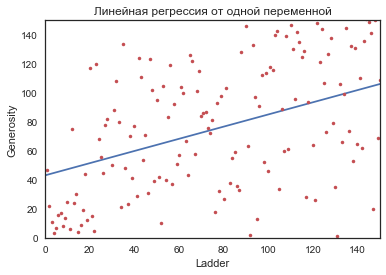

In [86]:
# Построим график линейной регресии
plt.xlabel('Ladder')
plt.ylabel('Generosity')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)
# Посчитаем предсказанные значения
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(Ladder, Generosity, 'r.')
plt.xlim(0,150)
plt.ylim(0,150)
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


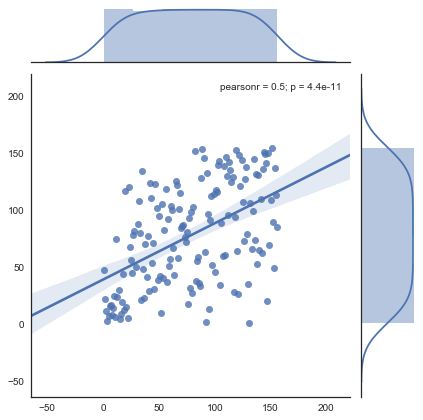

In [87]:
# corruption = df['Corruption']
# negative = df['Negative affect']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=Ladder, y=Generosity, data=z, kind='reg')
plt.show()

Собственное значение:  3035.63 Собственный вектор:  [0.71116669 0.70302343]


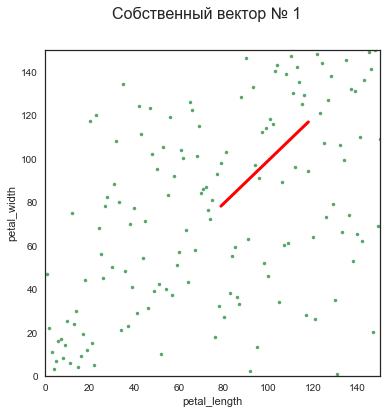

Собственное значение:  1017.6 Собственный вектор:  [-0.70302343  0.71116669]


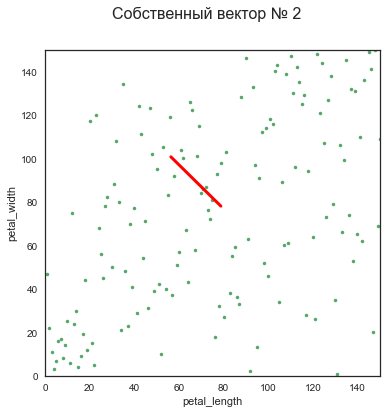

In [110]:
import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler

# petal_length = iris['petal_length']
# petal_width = iris['petal_width']

# Y = np.vstack((Ladder, Generosity)).T
# Y
w,v = la.eig(np.cov(z.T))


for i in range(len(w)):
    fig = plt.gcf()
    fig.set_size_inches(6,6)
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(Ladder, Generosity, 'g.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('petal_length')
    plt.xlim(0,150)
    plt.ylabel('petal_width')
    plt.ylim(0,150)
    plt.plot([Ladder.mean(), Ladder.mean() + math.sqrt(w[i]) * v[:,i][0]], 
             [Generosity.mean(), Generosity.mean() + math.sqrt(w[i]) * v[:,i][1]],color='red', linewidth=3)
    plt.show()

"Можно ли сказать, что данная прямая является собственным вектором?"
Ответ: нельзя.
    Для построения Линейной регрессии используется метод наименьших квадратов, которые минимизирует суммарную ошибку отклонения координат точек относительно оси Y.
    В PCA оптимизация происходит исходя из минимизации отклонений перпендикуляро к Главной компоненте (Собственному вектору). 
    Поэтому Линейная регрессия и собственный вектор не равны

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Частота (плотность)'), Text(0.5,0,'Uniform распределение')]

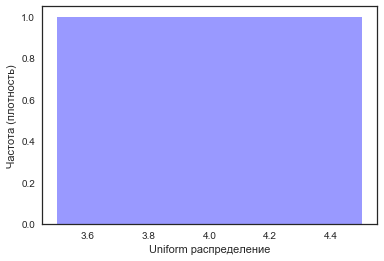

In [187]:
# Биномиальное - 6 сторон с равной вероятностью 1/6 количество запусков алгоритма формирования Random = 1

data_binom = stats.binom.rvs(n=10, p=0.166, size=1)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='blue')
ax.set(xlabel='Uniform распределение', ylabel='Частота (плотность)')


моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Частота (плотность)'), Text(0.5,0,'Биноминальное распределение')]

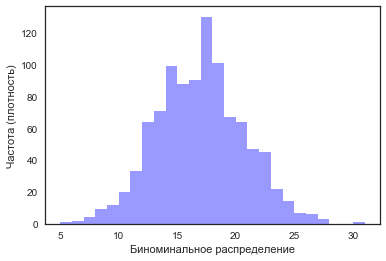

In [122]:
data_binom = stats.binom.rvs(n=100,p=1/6, size=1000)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='blue')
ax.set(xlabel='Биноминальное распределение', ylabel='Частота (плотность)')

"Почему график изменился? Почему можно применить центральную предельную теорему?"
Ответ: При увеличении количества подбрасываний, ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада. Поэтому форма распределения стремится к Нормальному